In [568]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy

In [569]:
data = pd.read_csv('sber_mlcource/boston_train_data.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [570]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


/home/drfobos/Ann/ann_venv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


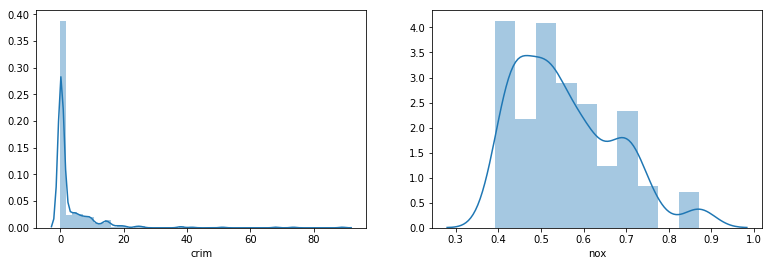

In [571]:
plt.figure(figsize=(13, 4))
plt.subplot(1, 2, 1)
sns.distplot(data['crim'])
plt.subplot(1, 2, 2)
sns.distplot(data['nox']);

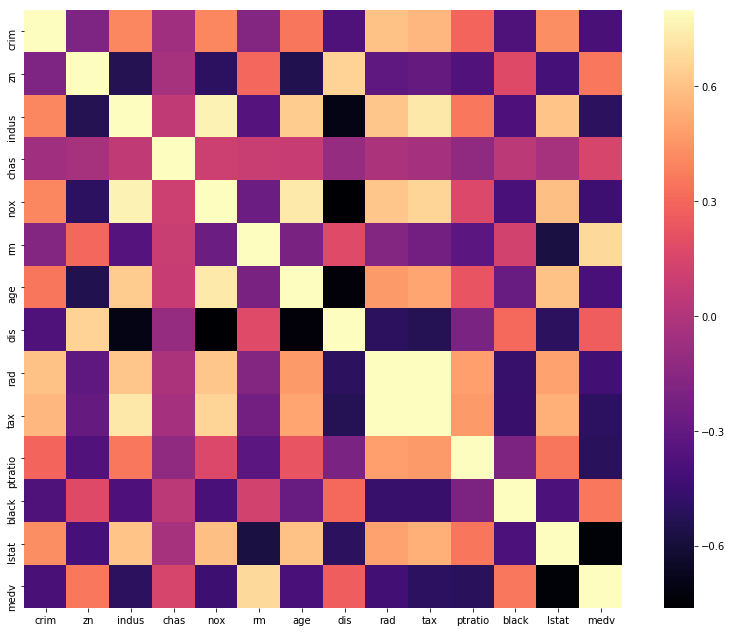

In [572]:
corr = data.corr()
plt.figure(figsize=(15, 11))
sns.heatmap(corr, vmax=.8, square=True, cmap='magma');

In [573]:
y = data.medv
data.drop(columns=['medv'], inplace=True)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43


In [574]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data, y, test_size=0.3, random_state=1)

In [575]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
#обучаем регрессию
reg.fit(X_train, Y_train)
#смотрим на качество
pred = reg.predict(X_test)
pred[:5]

array([31.23382361,  8.00228144, 12.92946675, 11.17336937, 19.55855989])

In [606]:
import statsmodels.api as sm

X2=sm.add_constant(X_train)
est=sm.OLS(Y_train, X2)
est2=est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     96.62
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           4.33e-90
Time:                        23:21:31   Log-Likelihood:                -786.93
No. Observations:                 282   AIC:                             1600.
Df Residuals:                     269   BIC:                             1647.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6535      4.074      1.388      0.1

In [577]:
data.drop(columns=['age','indus'], inplace=True)
data.head()

,crim,zn,chas,nox,rm,dis,rad,tax,ptratio,black,lstat
0,0.15876,0.0,0.0,0.413,5.961,5.2873,4.0,305.0,19.2,376.94,9.88
1,0.10328,25.0,0.0,0.453,5.927,6.9320,8.0,284.0,19.7,396.90,9.22
2,0.34940,0.0,0.0,0.544,5.972,3.1025,4.0,304.0,18.4,396.24,9.97
3,2.73397,0.0,0.0,0.871,5.597,1.5257,5.0,403.0,14.7,351.85,21.45
4,0.04337,21.0,0.0,0.439,6.115,6.8147,4.0,243.0,16.8,393.97,9.43


In [578]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
MSE(Y_test, pred), MAE(Y_test, pred)

(22.049835283394625, 3.1089304218997937)

/home/drfobos/Ann/ann_venv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


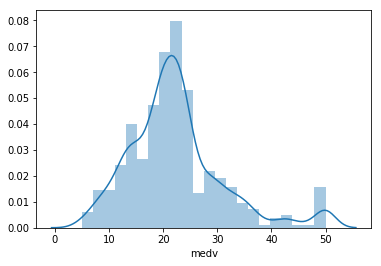

In [579]:
sns.distplot(y);

In [581]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=0.05)
reg.fit(X_train, Y_train)
pred = reg.predict(X_test)

In [582]:
MSE(Y_test, pred), MAE(Y_test, pred)

(23.436034874530158, 3.181375867301808)

In [583]:
params = np.linspace(0, 1, 20)

results = []
for a in params:
    reg = Lasso(alpha=a)
    reg.fit(X_train, Y_train)
    pred = reg.predict(X_test)
    results.append(MSE(pred, Y_test))

/home/drfobos/Ann/ann_venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/home/drfobos/Ann/ann_venv/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/home/drfobos/Ann/ann_venv/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


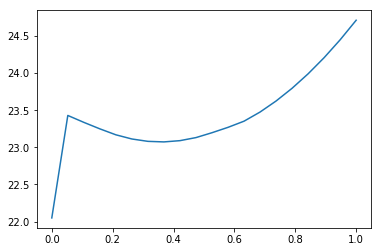

In [584]:
plt.plot(params, results)

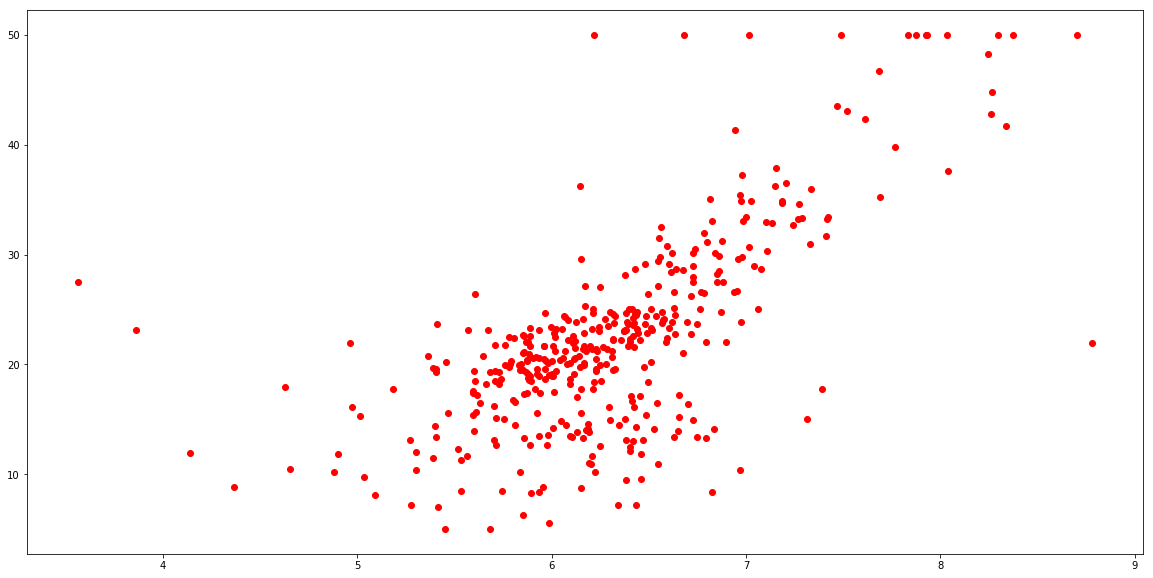

In [585]:
plt.figure(figsize=(20, 10))
plt.plot(data['rm'], y, 'o', c='red')
plt.show()

In [586]:
coefs = scipy.polyfit(data.rm, y, deg = 2)
coefs

array([  2.39333538, -21.75638127,  63.28346633])

In [587]:
poly = scipy.poly1d(coefs)
poly.coef

array([  2.39333538, -21.75638127,  63.28346633])

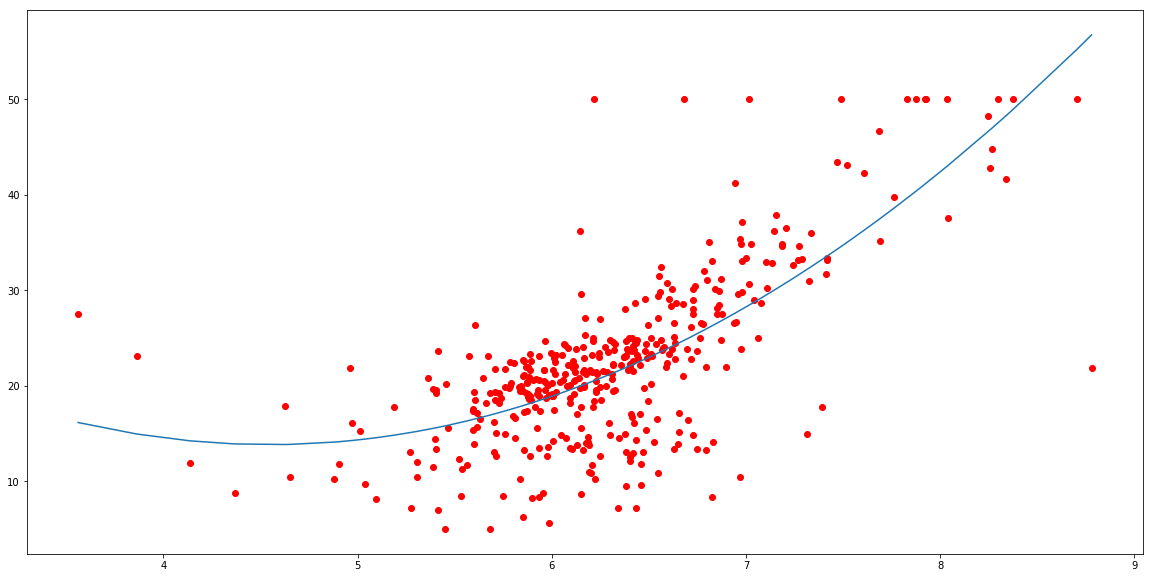

In [588]:
plt.figure(figsize=(20, 10))
plt.scatter(data.rm, y, c='red')
plt.plot(sorted(data.rm), poly(sorted(data.rm)))

In [589]:
data['rm'] = poly(np.array(data.rm))

In [590]:
X_train, X_test, Y_train, Y_test = train_test_split(data, y, test_size=0.3, random_state=1)

reg = LinearRegression()
reg.fit(X_train, Y_train)
pred = reg.predict(X_test)
MSE(Y_test, pred), MAE(Y_test, pred)

(16.886737594768753, 2.624440980634765)

In [591]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=0.05)
reg.fit(X_train, Y_train)
pred = reg.predict(X_test)
MSE(Y_test, pred), MAE(Y_test, pred)

(18.436109872111782, 2.7160412982601105)

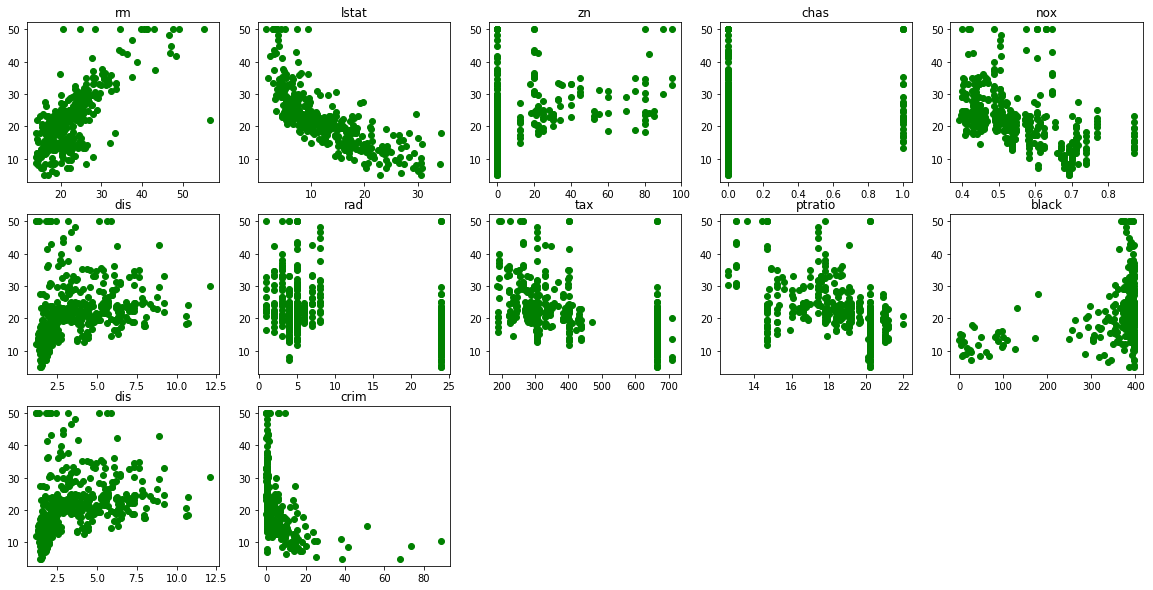

In [592]:
plt.figure(figsize=(20, 10))
plt.subplot(351)
plt.plot(data['rm'], y, 'o', c='green')
plt.title('rm')

plt.subplot(352)
b=plt.plot(data['lstat'], y, 'o', c='green')
plt.title('lstat')

plt.subplot(353)
b=plt.plot(data['zn'], y, 'o', c='green')
plt.title('zn')


plt.subplot(354)
b=plt.plot(data['chas'], y, 'o', c='green')
plt.title('chas')

plt.subplot(355)
b=plt.plot(data['nox'], y, 'o', c='green')
plt.title('nox')

plt.subplot(356)
b=plt.plot(data['dis'], y, 'o', c='green')
plt.title('dis')

plt.subplot(357)
b=plt.plot(data['rad'], y, 'o', c='green')
plt.title('rad')

plt.subplot(358)
b=plt.plot(data['tax'], y, 'o', c='green')
plt.title('tax')

plt.subplot(359)
b=plt.plot(data['ptratio'], y, 'o', c='green')
plt.title('ptratio')

plt.subplot(3,5,10)
b=plt.plot(data['black'], y, 'o', c='green')
plt.title('black')

plt.subplot(3,5,11)
b=plt.plot(data['dis'], y, 'o', c='green')
plt.title('dis')


plt.subplot(3,5,12)
b=plt.plot(data['crim'], y, 'o', c='green')
plt.title('crim')


plt.show()


In [593]:
coefs2 = scipy.polyfit(data.lstat, y, deg = 2)
coefs2

array([ 0.04409588, -2.30717968, 42.27138875])

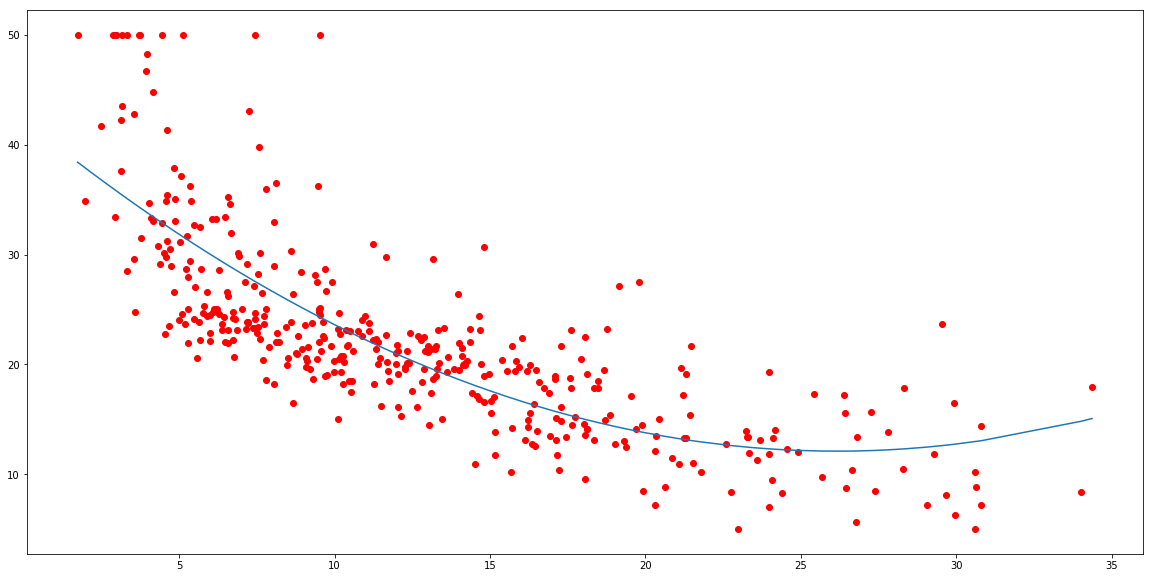

In [594]:
poly2 = scipy.poly1d(coefs2)
poly2.coef
plt.figure(figsize=(20, 10))
plt.scatter(data.lstat, y, c='red')
plt.plot(sorted(data.lstat), poly2(sorted(data.lstat)))

In [595]:
data['lstat'] = poly2(np.array(data.lstat))

In [596]:
X_train, X_test, Y_train, Y_test = train_test_split(data, y, test_size=0.3, random_state=1)

reg = LinearRegression()
reg.fit(X_train, Y_train)
pred = reg.predict(X_test)
MSE(Y_test, pred), MAE(Y_test, pred)

(15.092148217605516, 2.491561013437506)

In [538]:
coefs3 = scipy.polyfit(data.ptratio, y, deg = 3)
coefs3

array([-6.99919786e-02,  3.52203534e+00, -6.03000945e+01,  3.76556909e+02])

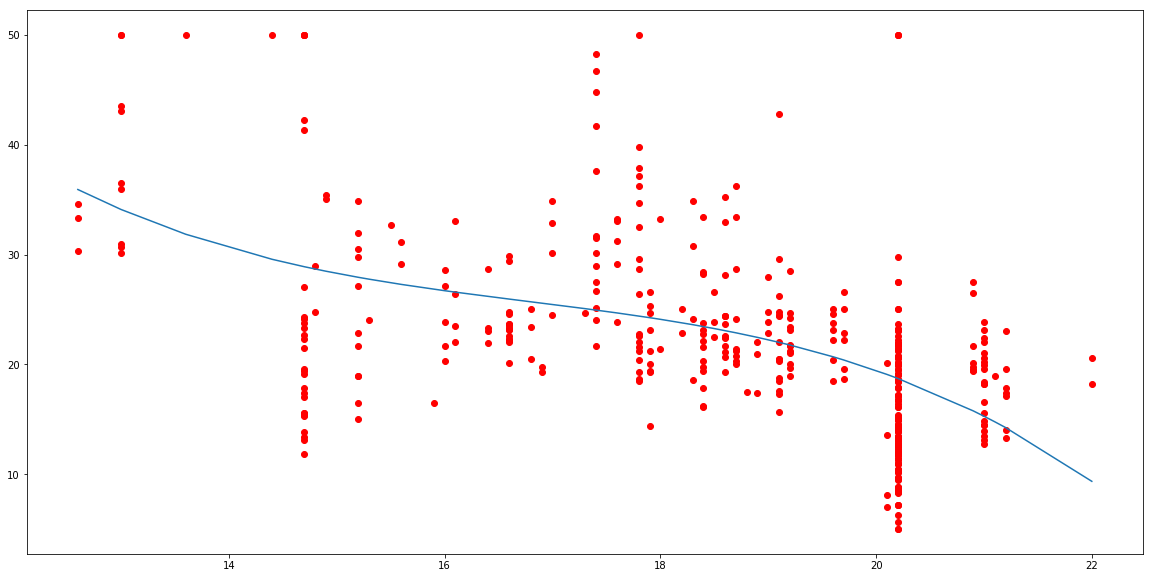

In [539]:
poly3 = scipy.poly1d(coefs3)
poly3.coef
plt.figure(figsize=(20, 10))
plt.scatter(data.ptratio, y, c='red')
plt.plot(sorted(data.ptratio), poly3(sorted(data.ptratio)))

In [540]:
data['ptratio'] = poly3(np.array(data.ptratio))

In [541]:
X_train, X_test, Y_train, Y_test = train_test_split(data, y, test_size=0.3, random_state=1)

reg = LinearRegression()
reg.fit(X_train, Y_train)
pred = reg.predict(X_test)
MSE(Y_test, pred), MAE(Y_test, pred)

(15.181387322111949, 2.511964981927905)

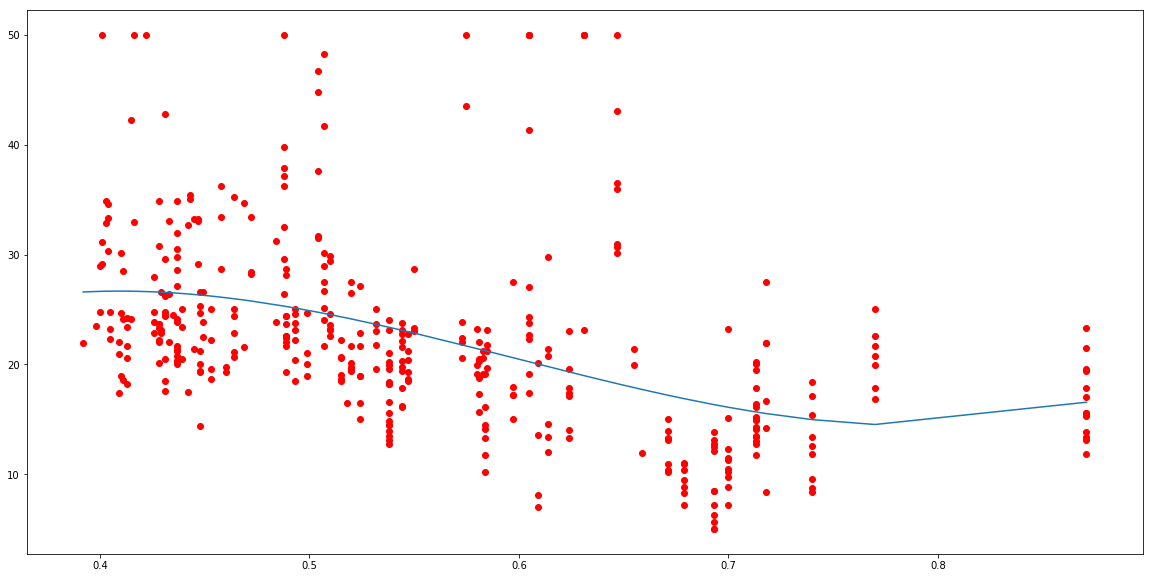

In [597]:
coefs4 = scipy.polyfit(data.nox, y, deg = 3)
coefs4
poly4 = scipy.poly1d(coefs4)
poly4.coef
plt.figure(figsize=(20, 10))
plt.scatter(data.nox, y, c='red')
plt.plot(sorted(data.nox), poly4(sorted(data.nox)))

In [598]:
data['nox'] = poly4(np.array(data.nox))

In [599]:
X_train, X_test, Y_train, Y_test = train_test_split(data, y, test_size=0.3, random_state=1)

reg = LinearRegression()
reg.fit(X_train, Y_train)
pred = reg.predict(X_test)
MSE(Y_test, pred), MAE(Y_test, pred)

(14.92135460806881, 2.4510499183202685)

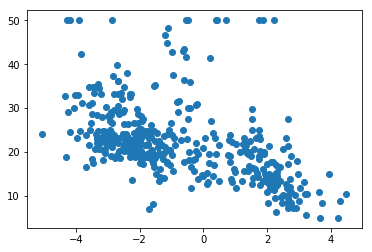

In [600]:
data['crim_adj']=np.log(data['crim'])
data.head()
plt.plot(data['crim_adj'],y,'o')

In [601]:
X_train, X_test, Y_train, Y_test = train_test_split(data, y, test_size=0.3, random_state=1)

reg = LinearRegression()
reg.fit(X_train, Y_train)
pred = reg.predict(X_test)
MSE(Y_test, pred), MAE(Y_test, pred)

(14.872142697529565, 2.4414328096299465)

In [602]:
data['crim_zn']=data.crim*data.zn


In [603]:
X_train, X_test, Y_train, Y_test = train_test_split(data, y, test_size=0.3, random_state=1)

reg = LinearRegression()
reg.fit(X_train, Y_train)
pred = reg.predict(X_test)
MSE(Y_test, pred), MAE(Y_test, pred)

(14.742968297857873, 2.4208509893309524)

In [549]:
data_corr=data.copy()
data_corr['y']=y
corr = data_corr[['y','crim_zn']].corr()
corr
data.head()

,crim,zn,chas,nox,rm,dis,rad,tax,ptratio,black,lstat,crim_adj,crim_zn
0,0.15876,0.0,0.0,26.669017,18.637311,5.2873,4.0,305.0,21.762815,376.94,23.780846,-1.840362,0.00000
1,0.10328,25.0,0.0,26.219241,18.409661,6.9320,8.0,284.0,20.396957,396.90,24.747712,-2.270312,2.58200
2,0.34940,0.0,0.0,23.114574,18.712147,3.1025,4.0,304.0,23.440143,396.24,23.651978,-1.051538,0.00000
3,2.73397,0.0,0.0,16.549251,16.487603,1.5257,5.0,403.0,28.891005,351.85,13.071010,1.005755,0.00000
4,0.04337,21.0,0.0,26.457591,19.737723,6.8147,4.0,243.0,25.698369,393.97,24.435906,-3.137987,0.91077


In [604]:
data.drop(columns='crim', inplace=True)
data.head()

,zn,chas,nox,rm,dis,rad,tax,ptratio,black,lstat,crim_adj,crim_zn
0,0.0,0.0,26.669017,18.637311,5.2873,4.0,305.0,19.2,376.94,23.780846,-1.840362,0.00000
1,25.0,0.0,26.219241,18.409661,6.9320,8.0,284.0,19.7,396.90,24.747712,-2.270312,2.58200
2,0.0,0.0,23.114574,18.712147,3.1025,4.0,304.0,18.4,396.24,23.651978,-1.051538,0.00000
3,0.0,0.0,16.549251,16.487603,1.5257,5.0,403.0,14.7,351.85,13.071010,1.005755,0.00000
4,21.0,0.0,26.457591,19.737723,6.8147,4.0,243.0,16.8,393.97,24.435906,-3.137987,0.91077


In [605]:
X_train, X_test, Y_train, Y_test = train_test_split(data, y, test_size=0.3, random_state=1)

reg = LinearRegression()
reg.fit(X_train, Y_train)
pred = reg.predict(X_test)
MSE(Y_test, pred), MAE(Y_test, pred)

(15.98611014610991, 2.622115176832397)

In [551]:
data_test = pd.read_csv('sber_mlcource/boston_test_data.csv')
data_test.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.07886,80.0,4.95,0.0,0.411,7.148,27.7,5.1167,4.0,245.0,19.2,396.90,3.56
1,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45
2,1.38799,0.0,8.14,0.0,0.538,5.950,82.0,3.9900,4.0,307.0,21.0,232.60,27.71
3,0.30347,0.0,7.38,0.0,0.493,6.312,28.9,5.4159,5.0,287.0,19.6,396.90,6.15
4,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80


In [618]:
data_test.drop(columns=['age','indus'],inplace=True)


KeyError: "['age' 'indus'] not found in axis"

In [622]:
data_test.drop(columns=['crim'],inplace=True)

In [607]:
data_test['rm'] = poly(np.array(data_test.rm))
data_test['lstat'] = poly2(np.array(data_test.lstat))
data_test['nox'] = poly4(np.array(data_test.nox))
data_test['crim_adj']=np.log(data_test['crim'])
data_test['crim_zn']=data_test.crim*data_test.zn


,id,price
0,0,31.606177
1,1,11.309243
2,2,11.661152
3,3,11.639341
4,4,18.176876


In [624]:
pred2=reg.predict(data_test)

In [625]:
s = pd.DataFrame({'id':np.arange(len(pred2)), 'price':pred2})
s.head()
s.to_csv('submission.csv', index=False)